## Questions:
* On which platform, most movies are present?<br>
* On which platform, the maximum number of highest rated movies are present?<br>
* Are Movies getting Longer?<br>
* Who are the best Directors?<br>
* Which Genres recieved the best ratings?<br>
* Top movies present on each platform<br>
* Best Movies Per Year, Directors and Genres<br>

## Reading and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [3]:
data = pd.read_csv("streamdata.csv")
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,16744.0,8372.500000,4833.720789,1.0,4186.75,8372.5,12558.25,16744.0
Year,16744.0,2003.014035,20.674321,1902.0,2000.00,2012.0,2016.00,2020.0
IMDb,16173.0,5.902751,1.347867,0.0,5.10,6.1,6.90,9.3
Netflix,16744.0,0.212613,0.409169,0.0,0.00,0.0,0.00,1.0
Hulu,16744.0,0.053930,0.225886,0.0,0.00,0.0,0.00,1.0
Prime Video,16744.0,0.737817,0.439835,0.0,0.00,1.0,1.00,1.0
Disney+,16744.0,0.033684,0.180419,0.0,0.00,0.0,0.00,1.0
Type,16744.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Runtime,16152.0,93.413447,28.219222,1.0,82.00,92.0,104.00,1256.0


In [7]:
print('Shape: ', data.shape)
print('\nColumns:', list(data.columns))

Shape:  (16744, 16)

Columns: ['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country', 'Language', 'Runtime']


## Data Preparation

In [8]:
data.isnull().sum().sort_values(ascending=False)

Rotten Tomatoes    11586
Age                 9390
Directors            726
Language             599
Runtime              592
IMDb                 571
Country              435
Genres               275
Type                   0
Disney+                0
Prime Video            0
Hulu                   0
Netflix                0
Year                   0
Title                  0
ID                     0
dtype: int64

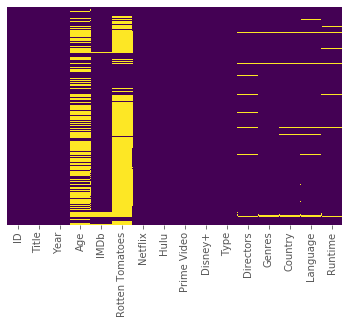

In [9]:
# yellow lines indicate the presence of null values.
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [10]:
# null percentage
null_percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

print('{} % of the attribute "Rotten Tomatoes" is missing, so we can drop this column.'.format(round(null_percent[0],2)))
print('{} % of the attribute "Age" is missing, so we can drop this column.'.format(round(null_percent[1],2)))

69.19 % of the attribute "Rotten Tomatoes" is missing, so we can drop this column.
56.08 % of the attribute "Age" is missing, so we can drop this column.


In [11]:
data.drop(['Rotten Tomatoes','Age'],axis=1,inplace=True)

In [12]:
data.dropna(inplace=True)
data.isnull().sum()

ID             0
Title          0
Year           0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Type           0
Directors      0
Genres         0
Country        0
Language       0
Runtime        0
dtype: int64

In [13]:
# Add genres as categories and then merge the dataframes
genres_columns = data['Genres'].str.get_dummies(',')
data = pd.concat([data, genres_columns],axis=1,sort=False)
#data.head()
print(data.columns)

Index(['ID', 'Title', 'Year', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Type', 'Directors', 'Genres', 'Country', 'Language',
       'Runtime', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')


## Exploratory data analysis

### On which platform, most movies are present?

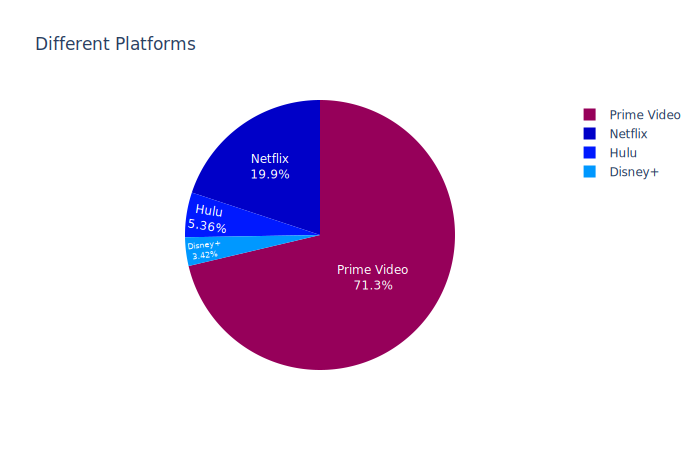

In [14]:
netflix = len(data[data['Netflix']==1])
hulu = len(data[data['Hulu']==1])
prime = len(data[data['Prime Video']==1])
disney = len(data[data['Disney+']==1])
Platform = ['Netflix','Hulu','Prime Video','Disney+']
Count = [netflix, hulu, prime, disney]

fig = px.pie(names = Platform,values = Count,title='Different Platforms',color_discrete_sequence = px.colors.sequential.Rainbow)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer='svg')

## On which platform, the maximum number of highest rated movies are present?

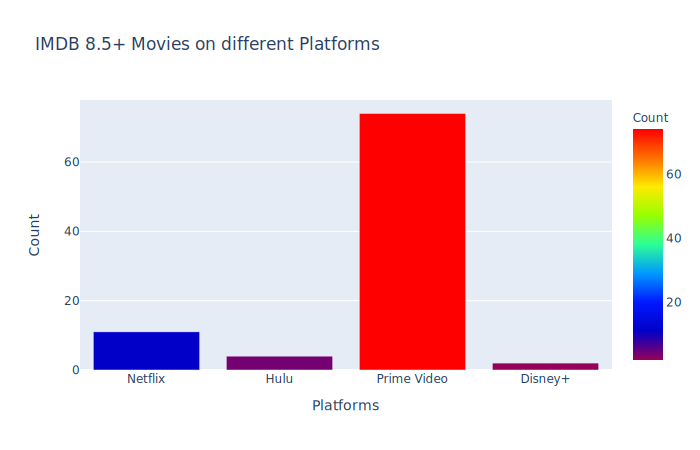

In [15]:
# new dataframe for each platform
netflix_movies = data.loc[data['Netflix'] == 1].drop(['Hulu', 'Prime Video', 'Disney+', 'Type'],axis=1)
hulu_movies = data.loc[data['Hulu'] == 1].drop(['Netflix', 'Prime Video', 'Disney+', 'Type'],axis=1)
prime_video_movies = data.loc[data['Prime Video'] == 1].drop(['Netflix','Hulu', 'Disney+', 'Type'],axis=1)
disney_movies = data.loc[data['Disney+'] == 1].drop(['Netflix','Hulu', 'Prime Video', 'Type'],axis=1)

# Define minimum rating
min_rating = 8.5

# Get the number of movies that have IMDB scores above our minimum rating
count_imdb = [len(netflix_movies[netflix_movies['IMDb']>min_rating]),
              len(hulu_movies[hulu_movies['IMDb']>min_rating]),
              len(prime_video_movies[prime_video_movies['IMDb']>min_rating]),
              len(disney_movies[disney_movies['IMDb']>min_rating])]

platform = ['Netflix','Hulu','Prime Video','Disney+']
top_rated = pd.DataFrame({'Platforms':platform,'Count':count_imdb})

fig = px.bar(top_rated, x='Platforms', y='Count', color='Count', color_continuous_scale='Rainbow',
             title='IMDB 8.5+ Movies on different Platforms')
fig.show(renderer='svg')

## Top movies present on each platform

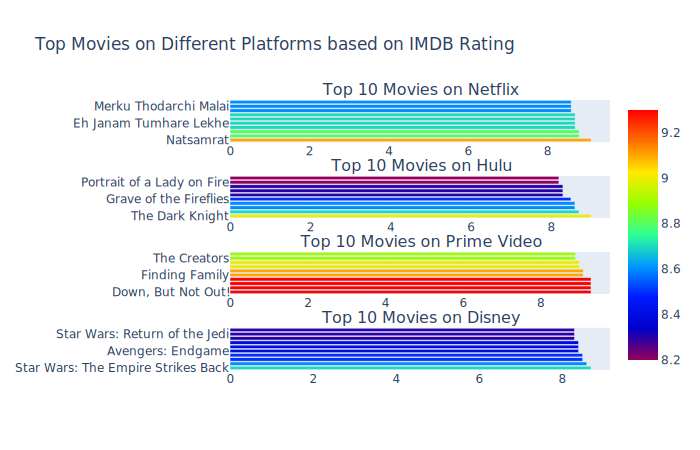

In [16]:
n = netflix_movies.sort_values('IMDb',ascending=False).head(10)
h = hulu_movies.sort_values('IMDb',ascending=False).head(10)
p = prime_video_movies.sort_values('IMDb',ascending=False).head(10)
d = disney_movies.sort_values('IMDb',ascending=False).head(10)

fig = make_subplots(rows=4, cols=1,subplot_titles=("Top 10 Movies on Netflix","Top 10 Movies on Hulu",
                                                   "Top 10 Movies on Prime Video","Top 10 Movies on Disney"))

fig.add_trace(go.Bar(y=n['Title'],x=n['IMDb'],orientation='h',marker=dict(color=n['IMDb'], coloraxis="coloraxis")),row=1,col=1)
fig.add_trace(go.Bar(y=h['Title'],x=h['IMDb'],orientation='h',marker=dict(color=h['IMDb'], coloraxis="coloraxis")),row=2,col=1)
fig.add_trace(go.Bar(y=p['Title'],x=p['IMDb'],orientation='h',marker=dict(color=p['IMDb'], coloraxis="coloraxis")),row=3,col=1)
fig.add_trace(go.Bar(y=d['Title'],x=d['IMDb'],orientation='h',marker=dict(color=d['IMDb'], coloraxis="coloraxis")),row=4,col=1)

fig.update_layout(height=1300, width=5000, title_text="Top Movies on Different Platforms based on IMDB Rating",
                  coloraxis=dict(colorscale='Rainbow'),showlegend=False)
fig.show(renderer='svg')

In [17]:
# top movies dataframe
n_list = list(n['Title'])
h_list = list(h['Title'])
p_list = list(p['Title'])
d_list = list(d['Title'])

dict = {'Netflix': n_list, 'Hulu': h_list, 'Prime Video': p_list, 'Disney' : d_list}
top_movies_each_df = pd.DataFrame(dict)
print('\t\t\t\t\tTop 10 Movies present on different platforms')
top_movies_each_df

					Top 10 Movies present on different platforms


,Netflix,Hulu,Prime Video,Disney
0,Natsamrat,The Dark Knight,"Down, But Not Out!",Star Wars: The Empire Strikes Back
1,Inception,GoodFellas,Bounty,Star Wars: A New Hope
2,"The Good, the Bad and the Ugly",Parasite,Steven Banks: Home Entertainment Center,The Lion King
3,Bill Hicks: Relentless,The Green Mile,Square One,Newsies: The Broadway Musical
4,Eh Janam Tumhare Lekhe,Grave of the Fireflies,Finding Family,Avengers: Endgame
5,Untamed Romania,Andy Irons: Kissed by God,Where's Daddy?,Coco
6,The Matrix,Larger than Life: The Kevyn Aucoin Story,Escape from Firebase Kate,WALL·E
7,Bill Hicks: Revelations,Good Will Hunting,A Dog Named Gucci,Empire of Dreams: The Story of the Star Wars T...
8,Merku Thodarchi Malai,Portrait of a Lady on Fire,The Creators,Star Wars: Return of the Jedi
9,Luciano Mellera: Infantiloide,Batman Begins,Peter Gabriel: Secret World Live,Before the Flood


## Best Movies Per Year, Directors and Genres

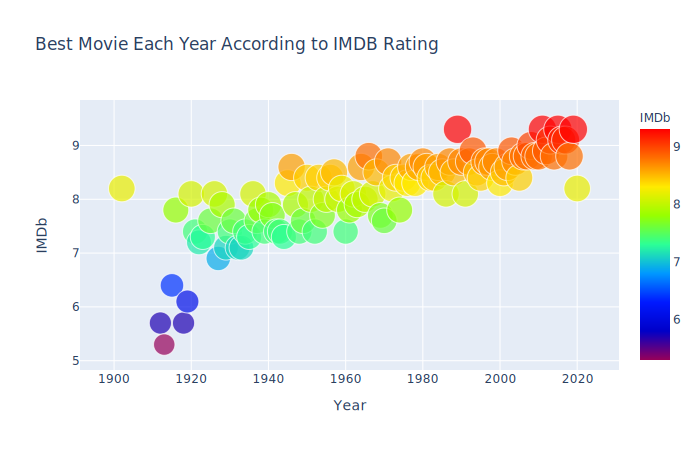

In [18]:
best_movie_year = data.sort_values('IMDb',ascending=False).groupby('Year').first().reset_index()

fig = px.scatter(best_movie_year, x='Year', y='IMDb', hover_data=['Title','Runtime','Genres','Language'], color='IMDb', 
                 size='IMDb', color_continuous_scale='Rainbow', title='Best Movie Each Year According to IMDB Rating')

fig.show(renderer='svg')

## Are Movies getting Longer?

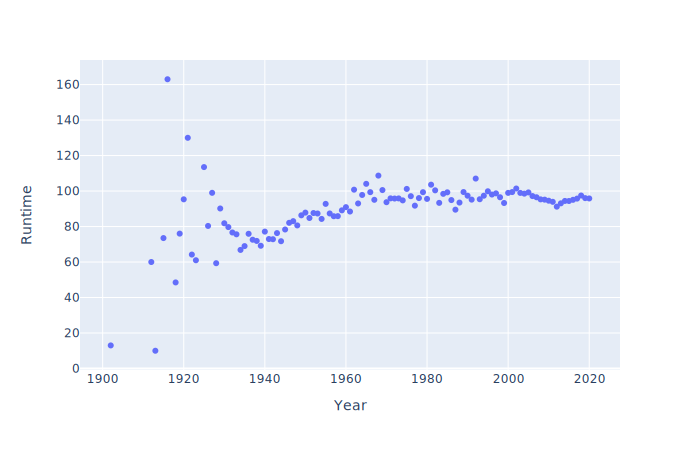

In [19]:
year_runtime = data.groupby('Year')['Runtime'].mean().reset_index()

fig = px.scatter(year_runtime, x="Year", y="Runtime")
fig.show(renderer='svg')

## Who are the best Directors?

In [20]:
dir_count = data.groupby('Directors')['Title'].count()
dir_rating = data.groupby('Directors')['IMDb'].mean()
dir_movie = data.groupby('Directors')[['Netflix','Hulu','Prime Video','Disney+']].sum()

dir_data = pd.concat([dir_count,dir_movie,dir_rating],axis=1).reset_index()
dir_data = dir_data.rename(columns={'Title':'Movie Count', 'IMDb':'Avg Rating'})

dir_count_data = dir_data.sort_values('Movie Count',ascending=False).head(10)
dir_count_data.head()

,Directors,Movie Count,Netflix,Hulu,Prime Video,Disney+,Avg Rating
4453,Jay Chapman,35,11,0,28,0,6.462857
5345,Joseph Kane,30,0,0,30,0,6.240000
1674,Cheh Chang,26,2,0,25,0,6.757692
8998,Sam Newfield,22,0,0,22,0,5.468182
4800,Jim Wynorski,22,0,0,22,0,3.681818


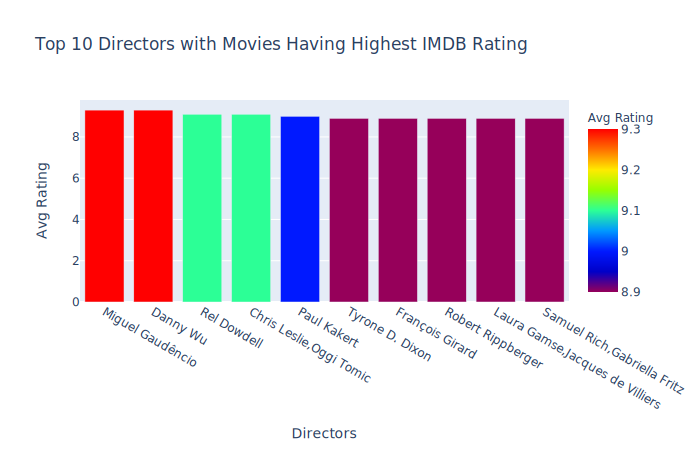

In [21]:
dir_rating_data = dir_data.sort_values('Avg Rating',ascending=False).head(10)

fig = px.bar(dir_rating_data, x='Directors', y='Avg Rating', color='Avg Rating', color_continuous_scale='Rainbow',
             hover_data=['Movie Count','Netflix','Hulu','Prime Video','Disney+'],
             title='Top 10 Directors with Movies Having Highest IMDB Rating')

fig.show(renderer='svg')

## Which Genres recieved the best ratings?

In [22]:
gen_count = data.groupby('Genres')['Title'].count()
gen_movie = data.groupby('Genres')[['Netflix','Hulu','Prime Video','Disney+']].sum()

gen_data = pd.concat([gen_count,gen_movie],axis=1).reset_index().rename(columns={'Title':'Movie Count'})
gen_data = gen_data.sort_values('Movie Count',ascending=False)[:10]

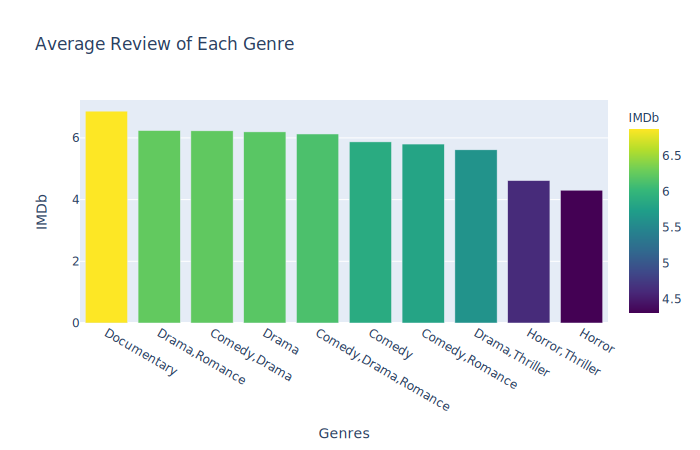

In [23]:
top_ten_genres = list(gen_data['Genres'].unique())

gen_rating = data.groupby('Genres')['IMDb'].mean().reset_index()
gen_rating = gen_rating[gen_rating['Genres'].isin(top_ten_genres)]

gen_rating = gen_rating.sort_values('IMDb', ascending=False)

fig = px.bar(gen_rating, x='Genres', y='IMDb', color='IMDb', color_continuous_scale='Viridis', 
             title='Average Review of Each Genre')

fig.show(renderer='svg')